# Comparison of content between Netflix, Amazon Prime and Disney+
## 1. Introduction
The online streaming domain has been heating up with the entry of Disney+, Apple, HBO Max and NBC Peacock. However, Netflix remains the biggest player in the market with Amazon Prime Video trailing behind it. 

In this project I have compared the content between Amazon, Dinsey+ and Netflix to gather insights into this online streaming war. The main questions that I am interested in are- <br>
1) Which online streaming platform has more content and how is it split between movies and TV shows? <br>
2) Does a particular streaming platform has more high quality content comapred to others? <br>
3) In which genres is Netflix creating more original content? And how does it vary over years? <br>
4) Which genres are the most popular among Netflix, Amaozn and Disney+? <br>
5) Which streaming platform has the latest content? <br>
6) 

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import seaborn as sns
import json
import time

## 2. Data Gathering
The catalog for both Amazon Prime Video and Netflix have been scraped from reelgood.com which is an online streaming aggregator and helps one watch all the online content in one place. <br>
The genre of the TV shows and movies have been scraped from Finder.com which is a service used for comparing products such as cred cards, martgages.

### 2.1 Gathering from reelgood.com

In [2]:
# Extracting the content from reelgood.com using Beautiful Soup

def reel_good_scraping(total_content,url_base):
    """ Extracting the content from reelgood.com using Beautiful Soup
    Input: total number of pages that has the content (int) and base URL
    Output: Pandas Dataframe"""
    
    start= time.time()

    for page in range(0,total_content,50): # List of all the pages in the website

        print(page, end=',') # for telling the status of the current iteration

        time.sleep(np.random.randint(5,25))

        try:

            # URL for the reelgood website
            url = url_base +str(page)

            # Extracting the HTML elements with Beautiful soup
            response= requests.get(url)
            soup = BeautifulSoup(response.content, 'html.parser' )

            # Finding the number of titles in the extracted page
            page_length= len(soup.find_all('td', class_="css-1u7zfla e126mwsw1"))

            # Initiating empty lists to make the dataframe
            title= []
            year = []
            age_group= []
            imdb= []
            rt=[]

            for i in range(page_length):
                # extracting the title from the soup element
                title.append(soup.find_all('td', class_="css-1u7zfla e126mwsw1")[i].find('a').contents[0])

                # extracting the year information from the soup element
                year.append(soup.find_all('td', class_="css-1u11l3y")[4*i].contents[0])

                # extracting the age group detail from the soup element
                age_group.append(soup.find_all('td', class_="css-1u11l3y")[4*i+1].contents[0])

                # extracting the imdb rating from the soup element
                imdb.append(soup.find_all('td', class_="css-1u11l3y")[4*i+2].contents[0])

                # extracting the rotten tomatoes rating from the soup element
                rt.append(soup.find_all('td', class_="css-1u11l3y")[4*i+3].contents[0])

                # forming a dataframe for each iteration
                df_temp = pd.DataFrame({'title':title,'year':year,'age_group':age_group, 'imdb':imdb,'rotten_tomato':rt} )

            if page==0:
                df = df_temp

            else:
                df = pd.concat([df, df_temp]) # appending the dataframe for each iteration

        except:
            print('Error on page:',page)
            continue

    end= time.time()
     
    print(round(end-start,0),'s')
    
    return df

In [3]:
# exporting the netflix content
df= reel_good_scraping(5801,'https://reelgood.com/source/netflix?offset=')

#Exporting the data to local hard drive
df.to_csv(r'C:\Users\srini\Projects\Online Streaming\netflix_shows.csv', index=False)

In [4]:
# exporting the Prime Video content
df= reel_good_scraping(15651,'https://reelgood.com/source/amazon?offset=')

#Exporting the data to local hard drive
df.to_csv(r'C:\Users\srini\Projects\Online Streaming\amazon.csv', index=False)

In [5]:
# exporting the Dinsey Plus content
df= reel_good_scraping(801,'https://reelgood.com/source/disney_plus?offset=')

#Exporting the data to local hard drive
df.to_csv(r'C:\Users\srini\Projects\Online Streaming\disney_plus.csv', index=False)

### 2.2 Gathering from finder.com

In [6]:
#Returns the movie/tv show genre and other details from finder.com

def genre_extract(url):
    """ Returns the movie/tv show genre and other details from finder.com
    args- url of finder.com
    output: dataframe with the movie/tv show information"""
    response= requests.get(url)
    return pd.read_html(response.content)[0]

In [7]:
# Extracting information for Netflix TV shows
df_netflix_tv= genre_extract('https://www.finder.com/netflix-tv-shows')

# Extracting information for Netflix movies
df_netflix_movie = genre_extract('https://www.finder.com/netflix-movies')

# Extracting information for Amazon Movies
df_amazon_movie = genre_extract('https://www.finder.com/amazon-prime-movies')

# Extracting information for Amazon TV shows
df_amazon_tv = genre_extract('https://www.finder.com/amazon-prime-tv-shows')

In [8]:
# Extracting information for Disney+ shows
df_disney_shows = genre_extract('https://www.finder.com/complete-list-disney-plus-movies-tv-shows-exclusives')

### 2.3 Gathering from Wikipedia

In [9]:
url_wiki= 'https://en.wikipedia.org/wiki/List_of_original_programs_distributed_by_Amazon'

response= requests.get(url_wiki)

In [10]:
# Extracting the Amazon Original Content from Wiki

for i in range(1,23):
    
    if i==1:
        df_prime_wiki= pd.read_html(response.content)[i]
    else:
        df_prime_wiki = pd.concat([df_prime_wiki,pd.read_html(response.content)[i]], sort= False)
    
df_prime_wiki.shape

(276, 13)

In [11]:
# Exporting content to local drive
df_prime_wiki.to_csv(r'C:\Users\srini\Projects\Online Streaming\prime_original.csv')

df_prime_wiki= df_prime_wiki[['Title','Language']]
df_prime_wiki.head(2)

,Title,Language
0,Bosch,NaN
1,Hand of God,NaN


## 3. Data Wrangling
### 3.1 Merging dataframes
Combining Netflix and Amazon into a common dataframe to help with analysis

In [12]:
# Retriving the data from local hard drive
df_netflix= pd.read_csv(r'C:\Users\srini\Projects\Online Streaming\netflix_shows.csv')
df_amazon= pd.read_csv(r'C:\Users\srini\Projects\Online Streaming\amazon.csv')
df_disney = pd.read_csv(r'C:\Users\srini\Projects\Online Streaming\disney_plus.csv')

In [13]:
df_netflix.head()

,title,year,age_group,imdb,rotten_tomato
0,Breaking Bad,2008,18+,9.5,96%
1,Inception,2010,13+,8.8,87%
2,Back to the Future,1985,7+,8.5,96%
3,The Matrix,1999,18+,8.7,88%
4,The Silence of the Lambs,1991,18+,8.6,96%


In [14]:
# Adding a column to indicate the streaming platform
df_netflix['streaming']= 'Netflix'
df_amazon['streaming']= 'Amazon'
df_disney['streaming']= 'Disney+'

In [15]:
df_amazon.head()

,title,year,age_group,imdb,rotten_tomato,streaming
0,The Silence of the Lambs,1991,18+,8.6,96%,Amazon
1,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,Amazon
2,The Pianist,2002,18+,8.5,95%,Amazon
3,The Avengers,2012,13+,8.0,92%,Amazon
4,Knives Out,2019,13+,7.9,97%,Amazon


In [16]:
# combining the dataframes
df= pd.concat([df_netflix, df_amazon, df_disney])
df.head()

,title,year,age_group,imdb,rotten_tomato,streaming
0,Breaking Bad,2008,18+,9.5,96%,Netflix
1,Inception,2010,13+,8.8,87%,Netflix
2,Back to the Future,1985,7+,8.5,96%,Netflix
3,The Matrix,1999,18+,8.7,88%,Netflix
4,The Silence of the Lambs,1991,18+,8.6,96%,Netflix


In [17]:
df.shape

(22313, 6)

### 3.2 Finding duplicates


In [18]:
# finding duplicate values
df.duplicated().sum()

2

In [19]:
# finding duplicate values
df[df.duplicated()]

,title,year,age_group,imdb,rotten_tomato,streaming
3938,El día menos pensado,2020,NaN,7.3,NaN,Netflix
4612,Lucid Dream,2017,NaN,6.1,NaN,Netflix


In [20]:
# removing the duplicate values
df.drop_duplicates(inplace= True)

In [21]:
# Checking
df.duplicated().sum()

0

### 3.3 Resetting the index
Since we concatenated 3 dataframes we need to remove the duplicate indices.

In [22]:
df.reset_index(inplace= True)
df.head(1)

,index,title,year,age_group,imdb,rotten_tomato,streaming
0,0,Breaking Bad,2008,18+,9.5,96%,Netflix


In [23]:
df.drop(columns='index', inplace= True)
df.head(1)

,title,year,age_group,imdb,rotten_tomato,streaming
0,Breaking Bad,2008,18+,9.5,96%,Netflix


### 3.4 Changing data type for  rotten tomatoes columns
Changing the rotten tomatoes columns to float values.

In [24]:
def rt_float_extract(x):
    """Function to extract the digits from the Rotten Tomatoes column
    Input: single rotten tomatoe rating value
    Output: float value"""
    try:
        temp= float(x[:2])
    except:
        temp= np.nan
    return temp

In [25]:
# extracting the digits from the Rotten Tomatoes column
df.rotten_tomato= df.rotten_tomato.apply(lambda x: rt_float_extract(x) )

In [26]:
df.head(2)

,title,year,age_group,imdb,rotten_tomato,streaming
0,Breaking Bad,2008,18+,9.5,96.0,Netflix
1,Inception,2010,13+,8.8,87.0,Netflix


### 3.5 Cleaning Netflix data from finder.com
- We need to extract the original content information from the Title. <br>
- Dropping the 'Watch it' column from TV shows and movies dataframes. <br>
- Clean the title information so that it doesnt have Season and Original info from TV show dataframe. <br>

In [27]:
df_netflix_movie.head()

,Title,Year of release,Runtime (mins),Genres,Watch it
0,#Rucker50,2016,56,Basketball Movies,Watch now
1,#Selfie,2014,125,Comedies,Watch now
2,#Selfie 69,2016,119,Comedies,Watch now
3,#cats_the_mewvie,2020,90,Canadian Movies,Watch now
4,#realityhighOriginal,2017,99,Comedies,Watch now


In [28]:
# Finding which title are Netflix original movies
df_netflix_movie['original']= df_netflix_movie.Title.apply(lambda x: 'Original' in x)

In [29]:
# Finding which title are Netflix original TV shows
df_netflix_tv['original']= df_netflix_tv.Title.apply(lambda x: 'Original' in x)

In [30]:
# dropping the Watch it column
df_netflix_tv.drop(columns='Watch it', inplace= True)
df_netflix_tv.head(1)

,Title,Year of release,Genres,original
0,100 HumansOriginalSeason 1 (8 episodes),2020,Science & Nature Docs Social & Cultural Docs D...,True


In [31]:
# dropping the Watch it column
df_netflix_movie.drop(columns='Watch it', inplace= True)
df_netflix_movie.head(1)

,Title,Year of release,Runtime (mins),Genres,original
0,#Rucker50,2016,56,Basketball Movies,False


In [32]:
# Function to return the title of the TV show/ movie cleaning the Original and Season information
def title_cleaning(x):
    for i in ['Original','Season','Collection']:
        if i in x:
            return x.split(i)[0]

In [33]:
# making a new column with the cleaned title
df_netflix_tv['Title']= df_netflix_tv.Title.apply(lambda x: title_cleaning(x))
df_netflix_tv.head(1)

,Title,Year of release,Genres,original
0,100 Humans,2020,Science & Nature Docs Social & Cultural Docs D...,True


### 3.6 Adding TV vs Movie column in the finder.com dataframes
- We need to add if the content is a TV or a movie

In [34]:
df_netflix_tv['type']='TV'
df_netflix_movie['type']='Movie'
df_amazon_movie['type']='Movie'
df_amazon_tv['type']='TV'

In [35]:
# Since Disney+ does not have seperate column for movie/tv type we can extract that info by seeing if the Title as 'Season'
# keyword in it

df_disney_shows['type'] =df_disney_shows.Title.apply(lambda x: 'TV' if 'Season' in x else 'Movie')
df_disney_shows.head(3)

,Title,Year of release,Genres,type
0,Marvel Studios' Avengers: Endgame,2019,Superhero Fantasy Action-Adventure Science Fic...,Movie
1,Marvel Studios' Captain Marvel,2019,Superhero Action-Adventure Science Fiction,Movie
2,Marvel Studios' Iron Man 3,2013,Superhero Action-Adventure Science Fiction,Movie


### 3.7 Concatenating the dataframes
- We need to add a column for streaming service before merging the dataframes.

In [36]:
# adding a column for the streaming service provider before merging the dataframes

df_netflix_tv['streaming']='Netflix'
df_netflix_movie['streaming']='Netflix'
df_amazon_movie['streaming']='Amazon'
df_amazon_tv['streaming']= 'Amazon'
df_disney_shows['streaming']='Disney'

In [37]:
# Merging the dataframes together

df_genre =pd.concat([df_netflix_tv,df_netflix_movie,df_amazon_movie,df_amazon_tv,df_disney_shows], sort= False)
df_genre.shape

(9893, 7)

In [38]:
df_genre.head(2)

,Title,Year of release,Genres,original,type,streaming,Runtime (mins)
0,100 Humans,2020.0,Science & Nature Docs Social & Cultural Docs D...,True,TV,Netflix,NaN
1,100% Hotter,2017.0,Reality TV Shows Makeover Reality TV British T...,False,TV,Netflix,NaN


In [39]:
# resetting the index
df_genre.reset_index(inplace= True)
df_genre.drop(columns='index', inplace= True)

### 3.8 Modifying the genre column
The genre column across Netflix, Disney+ and Amazon are different and need to be standardized.

In [40]:
# Creating a master list that has all the different genres in all the dataframes
genre_master= set()

def genre_cleaning(x):
    """function to create a masterlist of genre categories"""
    # set is used to prevent duplicates
    
    [genre_master.add(x.lower()) for x in str(x).split(' ')]

In [41]:
# Creating a master list that has all the different genres in all the dataframes

df_genre.Genres.apply(lambda x: genre_cleaning(x));

In [42]:
len(genre_master)

205

In [43]:
# Exporting the genre to csv file for easier analysis
file= open(r'C:\Users\srini\Projects\Online Streaming\genre_master.csv', 'w')
file.write(str(genre_master) )
file.close()

In the csv file I cleaned the different genre categories and grouped them into 20 different categories for easier analysis. Example action, adventure-action, adventure were grouped into Action genre.

In [44]:
# Creating a dictionary to group all similar types of genre categories together

genre_dic= {'action':['adventures','moviesaction','action-adventure','survival','adventure','action'],\
'sports': ['baseball','fitness','martial','wrestling','sports','boxing','basketball'],\
'thrillers_horror': ['thrillers','b-horror','thriller','dark','horror'],\
'comedy':['comedies','comic','moviescomedy','comics','sitcoms','comedy','stand-up'],\
'romantic':['romance','romantic','moviesromance'],'drama':[ 'crime','psychological','drama','tvdrama','police/cop',\
'k-dramas','tales','soap','musical','courtroom','wedding','melodrama','medical','teen','social','cult','survival',\
'moviesdrama','dark','family','dramas','fiction','reality','silent'], \
'others': ['novels','buddy','irreverent','independent','adult','lgbtq','parody','period','book','campy'],\
'misc':['incorrect','&','talk','age','movies','real','moviesprime','variety','books','films','tv','channels','/','country',\
'film','on','nan','release','together','new','procedural', 'for','show','competition','video','and','middle','light','of',\
 'issue','watch','prime','pieces','shows','series','a','coming','true','features','mecha','based','noir'],
'travel_life':[ 'travel','lifestyle','food','makeover','life','home','arts','nature','world','cultural','garden'],
'spiritual':[ 'spirituality','faith','spiritual'],\
'documentary_edu':['docuseries','docs','documentaries','documentary','historical','anthology','tvscience','biographical',\
 'animals','tvdocumentary','moviesdocumentary','mockumentaries','disaster','science','ecology'],\
'music':['hip-hop','music','opera','musical','concert','concerts','dance'],\
'military_political':[ 'military','spy/espionage','political','police/cop','politically'],\
'kids':['animal','webtoon','education',"kids'",'creature','disney','cartoons','children','animation','kids'],\
'anime':['shounen','anime','manga','seinen','animated','animation'],\
'mystery':['tvmystery','mysteries','moviesmystery','mystery'],\
'popular':['popular','favorites','moviestop-rated','top-rated','tvpopular','classic'],\
'game':['gamers','game'], 'fantasy':['fantasy','superhero','alien','cyborg','cyberpunk','sci-fi'],\
'regional':['israeli','mexican','british','african','zealand','dutch','polish','japanese','filipino','irish','thai',\
'romanian','k-dramas','austrian','international','spanish','latin','malaysian','swedish','australian','danish',\
 'hindi-language','russian','belgian','asian','colombian','korean','western','taiwanese','chinese','indian',\
'bengali-language','german','american','bollywood','westerns','french','western/folk','canadian','singaporean','italian',\
 'eastern','finnish','scandinavian','argentinian','telugu-language','brazilian','chilean']         
}

In [45]:
# Total number of genre categories
genre_dic.keys()

dict_keys(['action', 'sports', 'thrillers_horror', 'comedy', 'romantic', 'drama', 'others', 'misc', 'travel_life', 'spiritual', 'documentary_edu', 'music', 'military_political', 'kids', 'anime', 'mystery', 'popular', 'game', 'fantasy', 'regional'])

In [46]:
# Formatting the Genre column  to a lowercase and splitting it into a list of spaces
df_genre['Genres']= df_genre['Genres'].apply(lambda x: str(x).lower().split(' ') )

In [47]:
# Adding new columns for each of the genre categories
for i in genre_dic.keys():
    df_genre[i]= None

# Function that changes the coresponding genre column value to 1 for each genre found in the Genres column

def genre_col_func(genre_data):
    """Function that changes the coresponding genre column value to 1 for each genre found in the
    Genres column 
    Output: None"""
    global index
    
    for gd in genre_data: # Iterating through the Genres list for a row
        for gd_key in genre_dic.keys():  # Checking which key has its value matching with Genre word
            if gd in genre_dic[gd_key]:
                df_genre.loc[index, gd_key]=1    # updating the respective Genre column value to 1 if a match is found
    index +=1

In [48]:
index=0
df_genre.Genres.apply(lambda x: genre_col_func(x) );
df_genre.head()

,Title,Year of release,Genres,original,type,streaming,Runtime (mins),action,sports,thrillers_horror,...,documentary_edu,music,military_political,kids,anime,mystery,popular,game,fantasy,regional
0,100 Humans,2020.0,"[science, &, nature, docs, social, &, cultural...",True,TV,Netflix,NaN,None,None,None,...,1,None,None,None,None,None,None,None,None,None
1,100% Hotter,2017.0,"[reality, tv, shows, makeover, reality, tv, br...",False,TV,Netflix,NaN,None,None,None,...,None,None,None,None,None,None,None,None,None,1
2,12 Years Promise,2014.0,"[tv, comedies, tv, dramas, romantic, tv, comed...",False,TV,Netflix,NaN,None,None,None,...,None,None,None,None,None,None,None,None,None,1
3,13 Reasons Why,2019.0,"[tv, mysteries, tv, dramas, crime, tv, dramas,...",True,TV,Netflix,NaN,None,None,None,...,None,None,None,None,None,1,None,None,None,None
4,13 Reasons Why: Beyond the Reasons,2019.0,[docuseries],True,TV,Netflix,NaN,None,None,None,...,1,None,None,None,None,None,None,None,None,None


In [49]:
# Creating a backup
df_copy= df.copy()
df_genre_copy= df_genre.copy()

### 3.9 Minor cleaning
- Renaming few columns in df_genre <br>
- dropping year from df_genre <br>

In [51]:
# Renaming few columns in df_genre
df_genre.rename(columns={'Runtime (mins)':'runtime','Title':'title', 'Year of release':'year'}, inplace= True)
df_genre.head()

,title,year,Genres,original,type,streaming,runtime,action,sports,thrillers_horror,...,documentary_edu,music,military_political,kids,anime,mystery,popular,game,fantasy,regional
0,100 Humans,2020.0,"[science, &, nature, docs, social, &, cultural...",True,TV,Netflix,NaN,None,None,None,...,1,None,None,None,None,None,None,None,None,None
1,100% Hotter,2017.0,"[reality, tv, shows, makeover, reality, tv, br...",False,TV,Netflix,NaN,None,None,None,...,None,None,None,None,None,None,None,None,None,1
2,12 Years Promise,2014.0,"[tv, comedies, tv, dramas, romantic, tv, comed...",False,TV,Netflix,NaN,None,None,None,...,None,None,None,None,None,None,None,None,None,1
3,13 Reasons Why,2019.0,"[tv, mysteries, tv, dramas, crime, tv, dramas,...",True,TV,Netflix,NaN,None,None,None,...,None,None,None,None,None,1,None,None,None,None
4,13 Reasons Why: Beyond the Reasons,2019.0,[docuseries],True,TV,Netflix,NaN,None,None,None,...,1,None,None,None,None,None,None,None,None,None


In [52]:
# dropping year column from df_genre as df as that info
df_genre.drop(columns='year', inplace= True)

### 3.10 Missing values

In [53]:
# Rows with missing titles
df_genre.dropna(subset=['title'], inplace= True)
df_genre.isna().sum()

title                    0
Genres                   0
original              4336
type                     0
streaming                0
runtime               6108
action                8535
sports                9715
thrillers_horror      9294
comedy                8065
romantic              9507
drama                 4303
others                9525
misc                  2588
travel_life           9532
spiritual             9812
documentary_edu       8758
music                 9633
military_political    9700
kids                  7640
anime                 9170
mystery               9699
popular               8296
game                  9798
fantasy               9273
regional              7998
dtype: int64

### 3.11 Cleaning Title for Disney TV shows

In [54]:
# cleaning disney title column
df_genre.loc[df_genre.query('streaming=="Disney" and type=="TV"').index, 'title']= \
df_genre.query('streaming=="Disney" and type=="TV"').title.apply(lambda x: x.split('Season')[0])

In [55]:
df_genre.query('streaming=="Disney" and type=="TV"').title

8880                                Marvel's Hero Project
8882                                    Marvel's Runaways
8884                                Marvel's Agent Carter
8885                                    Marvel's Inhumans
8886                     Marvel's Rocket & Groot (Shorts)
                              ...                        
9877                                  Disney Prop Culture
9878                                           Shop Class
9879                           Disney Stuck In The Middle
9880    Walt Disney Animation Studios: Short Circuit E...
9881                                           Zenimation
Name: title, Length: 247, dtype: object

### 3.12 Adding Regional Language section
- Adding a column for language if there is a region lanugage movie

In [56]:
# Adding a column for language if there is a region lanugage movie
df_genre['country']= df_genre['Genres'].apply(lambda x: str([y for y in genre_dic['regional'] if (y in x)])[1:-1])

In [57]:
df_genre.columns

Index(['title', 'Genres', 'original', 'type', 'streaming', 'runtime', 'action',
       'sports', 'thrillers_horror', 'comedy', 'romantic', 'drama', 'others',
       'misc', 'travel_life', 'spiritual', 'documentary_edu', 'music',
       'military_political', 'kids', 'anime', 'mystery', 'popular', 'game',
       'fantasy', 'regional', 'country'],
      dtype='object')

### 3.13 Merging the dataframes together

In [71]:
# Exporting the df_genre to create a backup
df_genre.to_csv(r'C:\Users\srini\Projects\Online Streaming\df_genre_clean.csv', index= False)

In [186]:
df_genre= pd.read_csv(r'C:\Users\srini\Projects\Online Streaming\df_genre_clean.csv')

In [187]:
# Matching the title columns for both the dataframes
def title_match(x):
    """Matching the title columns for both the dataframes"""
    for y in list(df_genre.title):
        if x.lower() == y.lower():
            return y
        
        if x.lower() in y.lower():
            return y

df['title2']= df.title.apply(lambda x: title_match(x) )
df.head(1)

,title,year,age_group,imdb,rotten_tomato,streaming,title2
0,Breaking Bad,2008,18+,9.5,96.0,Netflix,Breaking Bad


In [245]:
df_genre['title2']= df_genre['title']
df_merge= pd.merge(df, df_genre, on='title2', how='left')
df_merge.head(1)

,title_x,year,age_group,imdb,rotten_tomato,streaming_x,title2,title_y,Genres,original,...,music,military_political,kids,anime,mystery,popular,game,fantasy,regional,country
0,Breaking Bad,2008,18+,9.5,96.0,Netflix,Breaking Bad,Breaking Bad,"['tv', 'dramas', 'crime', 'tv', 'dramas', 'tv'...",False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [246]:
# Missing data for Netflix
df_merge.query('streaming_x=="Netflix"')['title2'].isna().sum()

1466

In [247]:
# resetting the index to prevent duplicate indexing
df_merge.reset_index(inplace= True)
df_merge.drop(columns='index', inplace= True)

df_prime_wiki.reset_index(inplace= True)
df_prime_wiki.drop(columns='index', inplace= True)

### 3.13 Changing Age-group to ordered categorical variable


In [338]:
# Changing Age-group to ordered categorical variable
age_category = pd.api.types.CategoricalDtype(['all','7+','13+','16+','18+'], ordered=True)

df_merge.age_group.astype(age_category)

0        18+
1        13+
2         7+
3        18+
4        18+
        ... 
22508    NaN
22509    NaN
22510    NaN
22511    NaN
22512    NaN
Name: age_group, Length: 22513, dtype: category
Categories (5, object): [all < 7+ < 13+ < 16+ < 18+]

In [337]:
df_merge.age_group.unique()

array(['18+', '13+', '7+', '16+', nan, 'all'], dtype=object)

In [371]:
df_merge.to_csv(r'C:\Users\srini\Projects\Online Streaming\df_merge.csv', index= False)

### 3.14 Dropping duplicates from the merged dataset

In [469]:
df_merge.drop_duplicates(subset=['title_x','streaming_x'], inplace= True )

In [496]:
df_prime_wiki['title']= df_prime_wiki['Title']
df_prime_wiki.head(1)

,Title,Language,title
0,Bosch,NaN,Bosch


In [499]:
pd.merge(df_prime_wiki, df, on='title', how='left')

,Title,Language,title,year,age_group,imdb,rotten_tomato,streaming,title2
0,Bosch,NaN,Bosch,2014.0,18+,8.4,97.0,Amazon,None
1,Hand of God,NaN,Hand of God,2014.0,18+,7.5,30.0,Amazon,None
2,The Man in the High Castle,NaN,The Man in the High Castle,2015.0,18+,8.0,84.0,Amazon,None
3,Mad Dogs,NaN,Mad Dogs,2015.0,18+,7.5,66.0,Amazon,None
4,Goliath,NaN,Goliath,2016.0,16+,8.2,82.0,Amazon,Davey & GoliathSeason 2
...,...,...,...,...,...,...,...,...,...
277,The Wheel of Time[113],NaN,The Wheel of Time[113],NaN,NaN,NaN,NaN,NaN,NaN
278,The Wilds[114],NaN,The Wilds[114],NaN,NaN,NaN,NaN,NaN,NaN
279,Packed to the Rafters (Back to the Rafters)[115],English,Packed to the Rafters (Back to the Rafters)[115],NaN,NaN,NaN,NaN,NaN,NaN
280,The Kids in the Hall (season 6)[117],English,The Kids in the Hall (season 6)[117],NaN,NaN,NaN,NaN,NaN,NaN


## 4. Exploratory Data Analysis
We will be visualizing the data to find any trends in it.

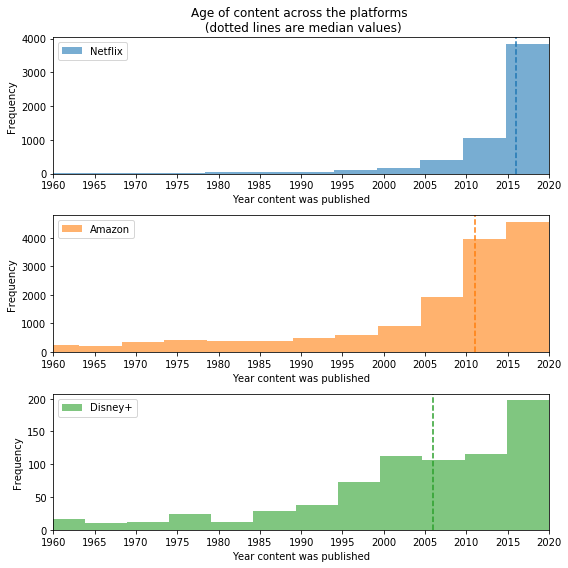

In [470]:
# Comparing how old the content is among all the streaming platforms

plt.figure(figsize=(8,8))
stream_list= ['Netflix','Amazon', 'Disney+']
color_list = ['tab:blue','tab:orange','tab:green']

for i in range(3):
    plt.subplot(3,1,i+1)
    
    series= df_merge[df_merge['streaming_x']==stream_list[i]]['year']
    my_bin= (max(series)-min(series))//5
    plt.hist(series, color=color_list[i], alpha=0.6, label= stream_list[i], bins= my_bin,  )
    plt.axvline(np.median(series), color=color_list[i], linestyle='--', alpha=1 )
    plt.legend()
    plt.xlim(1960,2020)
    plt.xticks(range(1960,2021,5))
    
    if i==0:
        plt.title('Age of content across the platforms \n (dotted lines are median values)')
    plt.xlabel('Year content was published')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

C:\Users\srini\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\srini\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


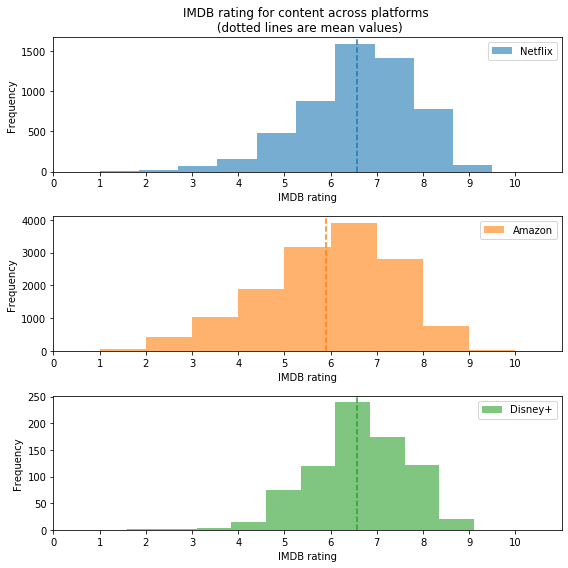

In [471]:
# Comparing imdb ratings among all the streaming platforms

plt.figure(figsize=(8,8))
stream_list= ['Netflix','Amazon', 'Disney+']
color_list = ['tab:blue','tab:orange','tab:green']

for i in range(3):
    plt.subplot(3,1,i+1)
    
    series= df_merge[df_merge['streaming_x']==stream_list[i]]['imdb']
    my_bin= 10
    
    plt.hist(series, color=color_list[i], alpha=0.6, label= stream_list[i], bins= my_bin,  )
    plt.axvline(np.mean(series), color=color_list[i], linestyle='--', alpha=1 )
    plt.legend()
    plt.xlim(0,11)
    plt.xticks(range(0,11,1))
    
    if i==0:
        plt.title('IMDB rating for content across platforms \n (dotted lines are mean values)')
    plt.xlabel('IMDB rating')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

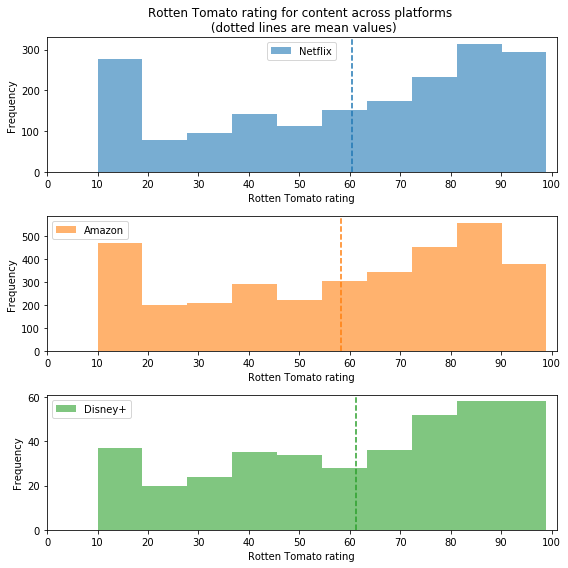

In [472]:
# Comparing rotten_tomato ratings among all the streaming platforms

plt.figure(figsize=(8,8))
stream_list= ['Netflix','Amazon', 'Disney+']
color_list = ['tab:blue','tab:orange','tab:green']

for i in range(3):
    plt.subplot(3,1,i+1)
    
    series= df_merge[df_merge['streaming_x']==stream_list[i]]['rotten_tomato']
    my_bin= 10
    
    plt.hist(series, color=color_list[i], alpha=0.6, label= stream_list[i], bins= my_bin,  )
    plt.axvline(np.mean(series), color=color_list[i], linestyle='--', alpha= 1 )
    plt.legend()
    plt.xlim(0,101)
    plt.xticks(range(0,101,10))
    
    if i==0:
        plt.title('Rotten Tomato rating for content across platforms \n (dotted lines are mean values)')
    plt.xlabel('Rotten Tomato rating')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

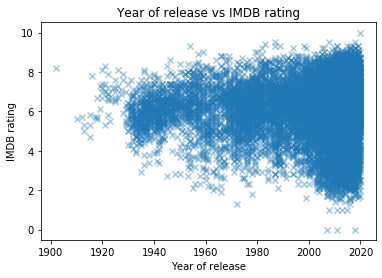

In [473]:
# Correlation between year of content and IMDB rating
plt.scatter(x=df_merge.year, y= df_merge.imdb,marker= 'x',alpha=0.4 )
plt.xlabel('Year of release')
plt.ylabel('IMDB rating')
plt.title('Year of release vs IMDB rating')
plt.show()

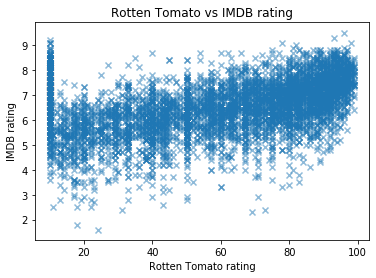

In [474]:
# Correlation between year of content and IMDB rating
plt.scatter(x=df_merge.rotten_tomato, y= df_merge.imdb,marker= 'x', alpha=0.5 )
plt.xlabel('Rotten Tomato rating')
plt.ylabel('IMDB rating')
plt.title('Rotten Tomato vs IMDB rating')
plt.show()

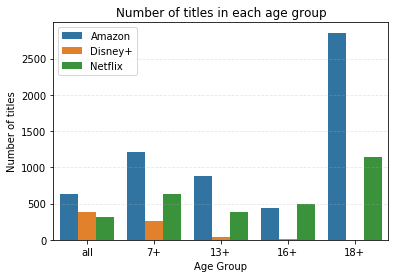

In [475]:
# Number of titles in each age group
age_plot= df_merge.groupby(by=['age_group','streaming_x']).count()['title_x'].reset_index()

sns.barplot(x=age_plot.age_group, y= age_plot.title_x, hue= age_plot.streaming_x, order=['all','7+','13+','16+','18+'])
plt.grid(alpha=0.3,linestyle='--', axis= 'y' )
plt.legend()
plt.xlabel('Age Group')
plt.ylabel('Number of titles')
plt.title('Number of titles in each age group')
plt.show()

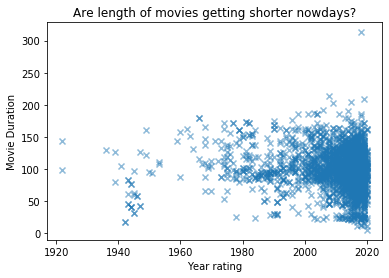

In [476]:
# Correlation between year and duration of movie
plt.scatter(x=df_merge.year, y= df_merge.runtime, marker= 'x', alpha=0.5 )
plt.xlabel('Year rating')
plt.ylabel('Movie Duration')
plt.title('Are length of movies getting shorter nowdays?')
plt.show()

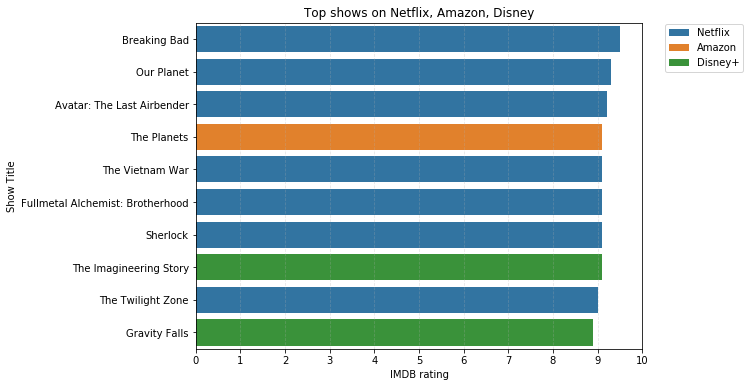

In [477]:
# Top online shows based on IMDB rating
imdb_top =df_merge.sort_values(by='imdb',ascending= False).query('rotten_tomato>=0').iloc[:10,:6]

plt.figure(figsize=(8,6))

sns.barplot(x= 'imdb' , y= 'title_x',data= imdb_top, hue= 'streaming_x', dodge= False )
plt.grid(linestyle='--', alpha=0.3, axis='x')
plt.xticks(range(11))
plt.xlabel('IMDB rating')
plt.ylabel('Show Title')
plt.title('Top shows on Netflix, Amazon, Disney')
plt.legend(loc= (1.05,0.85))
plt.show()

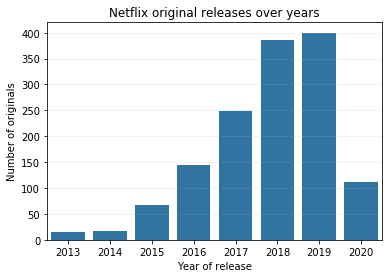

In [479]:
# Netflix original production over years

series= df_merge.query('original==True and streaming_x=="Netflix" and year>=2013').year.value_counts()
sns.barplot(x= series.index , y= series, color= 'tab:blue')
plt.grid(linestyle='--', alpha=0.3, axis='y')
plt.ylabel('Number of originals')
plt.xlabel('Year of release')
plt.title('Netflix original releases over years')
plt.show()

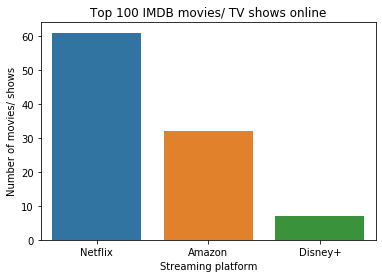

In [492]:
# Top 100 IMDB shows/ movies online

series= df_merge.sort_values(by='imdb',ascending= False).query('rotten_tomato>=0').iloc[:100,:6]['streaming_x'].value_counts()
sns.barplot(x= series.index, y=series)
plt.xlabel('Streaming platform')
plt.ylabel('Number of movies/ shows')
plt.title('Top 100 IMDB movies/ TV shows online')
plt.show()

In [506]:
df_merge.query('streaming_x=="Netflix"').regional

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
5896    NaN
5897    NaN
5898    NaN
5899    1.0
5900    1.0
Name: regional, Length: 5741, dtype: float64